     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

             target  
0    

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 127ms/step - accuracy: 0.3828 - loss: 2.1631 - val_accuracy: 0.2083 - val_loss: 1.7108
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2904 - loss: 2.1032 - val_accuracy: 0.2083 - val_loss: 1.6331
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3333 - loss: 1.9012 - val_accuracy: 0.2083 - val_loss: 1.5589
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3607 - loss: 1.7736 - val_accuracy: 0.2083 - val_loss: 1.4918
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2721 - loss: 1.9092 - val_accuracy: 0.2083 - val_loss: 1.4314
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3659 - loss: 1.6185 - val_accuracy: 0.2083 - val_loss: 1.3748
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2734 - loss: 1.6789 - val_accuracy: 0.2083 - val_loss: 1.3220
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2721 - loss: 1.7403 - val_accuracy: 0.2083 - val_loss

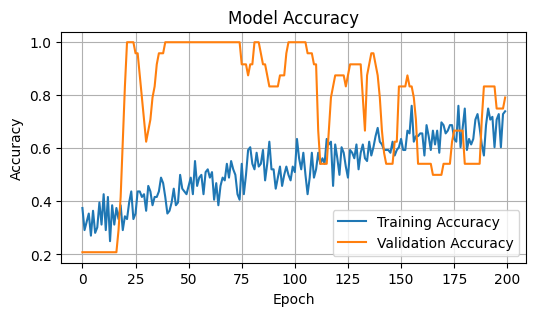

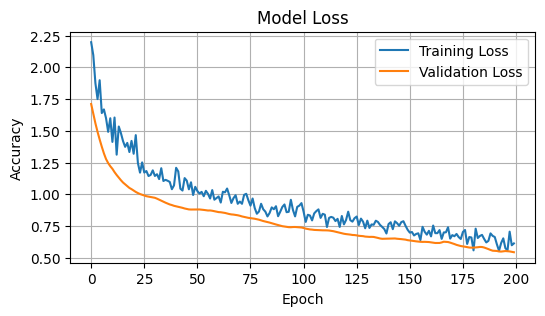

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


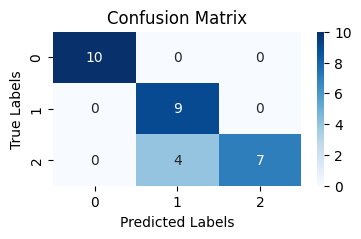

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.69      1.00      0.82         9
           2       1.00      0.64      0.78        11

    accuracy                           0.87        30
   macro avg       0.90      0.88      0.87        30
weighted avg       0.91      0.87      0.86        30



In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers
from sklearn import metrics

df=pd.read_csv('iris_dataset.csv')
print(df)
lab=LabelEncoder()
df['target']=lab.fit_transform(df['target'])
print(df)

x=df[['sepal length (cm)','petal length (cm)']]
y=df['target']
y=tf.keras.utils.to_categorical(y, num_classes=3)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

model= models.Sequential ([layers.Dense(units = 16, activation='relu',input_shape = (2,)),layers.Dropout(0.3),
                          layers.Dense(units = 8, activation='relu'),layers.Dropout(0.3),
                          layers.Dense(units = 3, activation='softmax')])
 
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)
history = model.fit(x_train,y_train,epochs=200,verbose=1,validation_split=0.2,callbacks=[early_stopping])


# Plot the training and validation accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(6, 3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

yp=model.predict(x_test)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Check if the arrays are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

if len(yp.shape) > 1 and yp.shape[1] > 1:
    yp = np.argmax(yp, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, yp)

# Visualize the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Generate the classification report
report = classification_report(y_test, yp)
print("Classification Report:")
print(report)


In [5]:
num_classes = len(np.unique(df['target']))
num_classes

3